Sonification
=======

First, let's import dependencies:

In [1]:
%matplotlib notebook

import math
import random
import time

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as fft
import pygame

import sound_drivers.pg_tools as pg_tools
import sound_drivers.sc_tools as sc_tools

from synth import get_frequencies

Initialize audio:

In [3]:
pg_tools.init_audio()
sc_tools.init_audio()

2017-10-04 12:59:47,946 [acoustic_sight] [DEBUG] Initializing PyGame mixer...
2017-10-04 12:59:47,950 [acoustic_sight] [INFO] PyGame mixer initialized: (88200, -16, 1)
2017-10-04 12:59:47,951 [acoustic_sight] [DEBUG] Starting SuperCollider server...
2017-10-04 12:59:47,953 [acoustic_sight] [INFO] SuperCollider server started: supriya.tools.servertools.Server(
    ip_address='127.0.0.1',
    port=57751,
    )


Play PyGame sine wave at 440 Hz:

In [4]:
pg_440 = pg_tools.PGTone(440., .1)
pg_440.play(-1)
time.sleep(1)
pg_440.stop()

Play SuperCollider sine wave at 440 Hz:

In [9]:
sc_440 = sc_tools.SCTone(440., .1)
sc_440.play()
time.sleep(1)
sc_440.stop()

2017-10-04 13:00:18,757 [acoustic_sight] [DEBUG] Create dedicated SuperCollider tone group: supriya.tools.servertools.Group(
    children=(),
    )
2017-10-04 13:00:18,810 [acoustic_sight] [DEBUG] Pushed tone synth for 440.0 Hz to SuperColider server


TIMED OUT: GroupNewRequest(
    add_action=AddAction.ADD_TO_HEAD,
    node_id=1008,
    target_node_id=1
    )


2017-10-04 13:00:19,812 [acoustic_sight] [DEBUG] Released tone synth for 440.0 Hz from SuperColider server


Create signals:

<IPython.core.display.Javascript object>


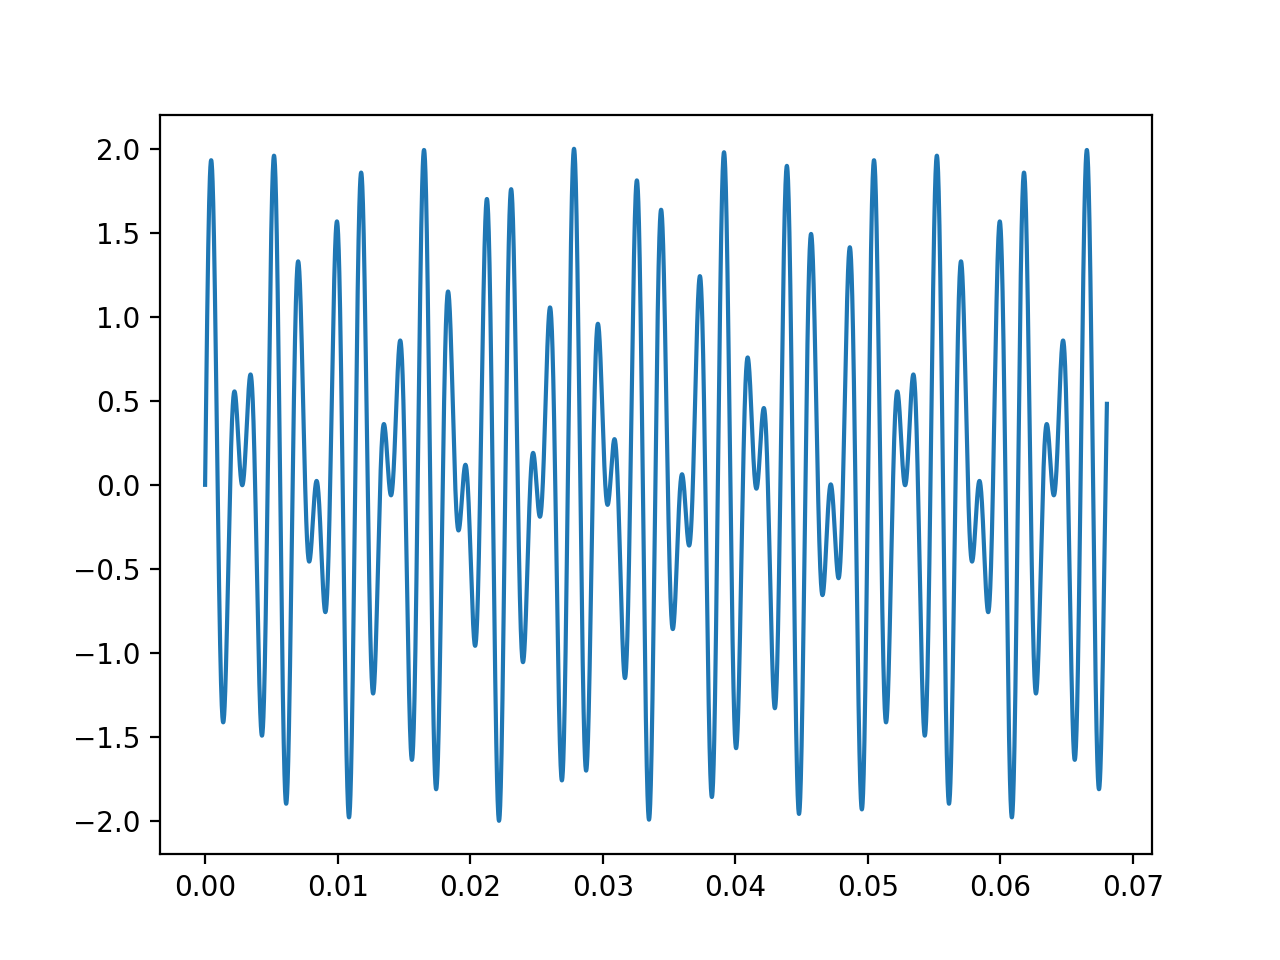

In [10]:
sample_rate = pygame.mixer.get_init()[0]
frame_size = 1500 * 4
frame_period = frame_size / sample_rate
time_vector = np.linspace(start=0, stop=frame_period, num=frame_size)

sin_440 = np.sin(time_vector * 2 * math.pi * 440)
sin_620 = np.sin(time_vector * 2 * math.pi * 620)
plt.plot(time_vector, sin_440 + sin_620)

Pass signal through fast fourier transformation and then reconstract it back:

<IPython.core.display.Javascript object>


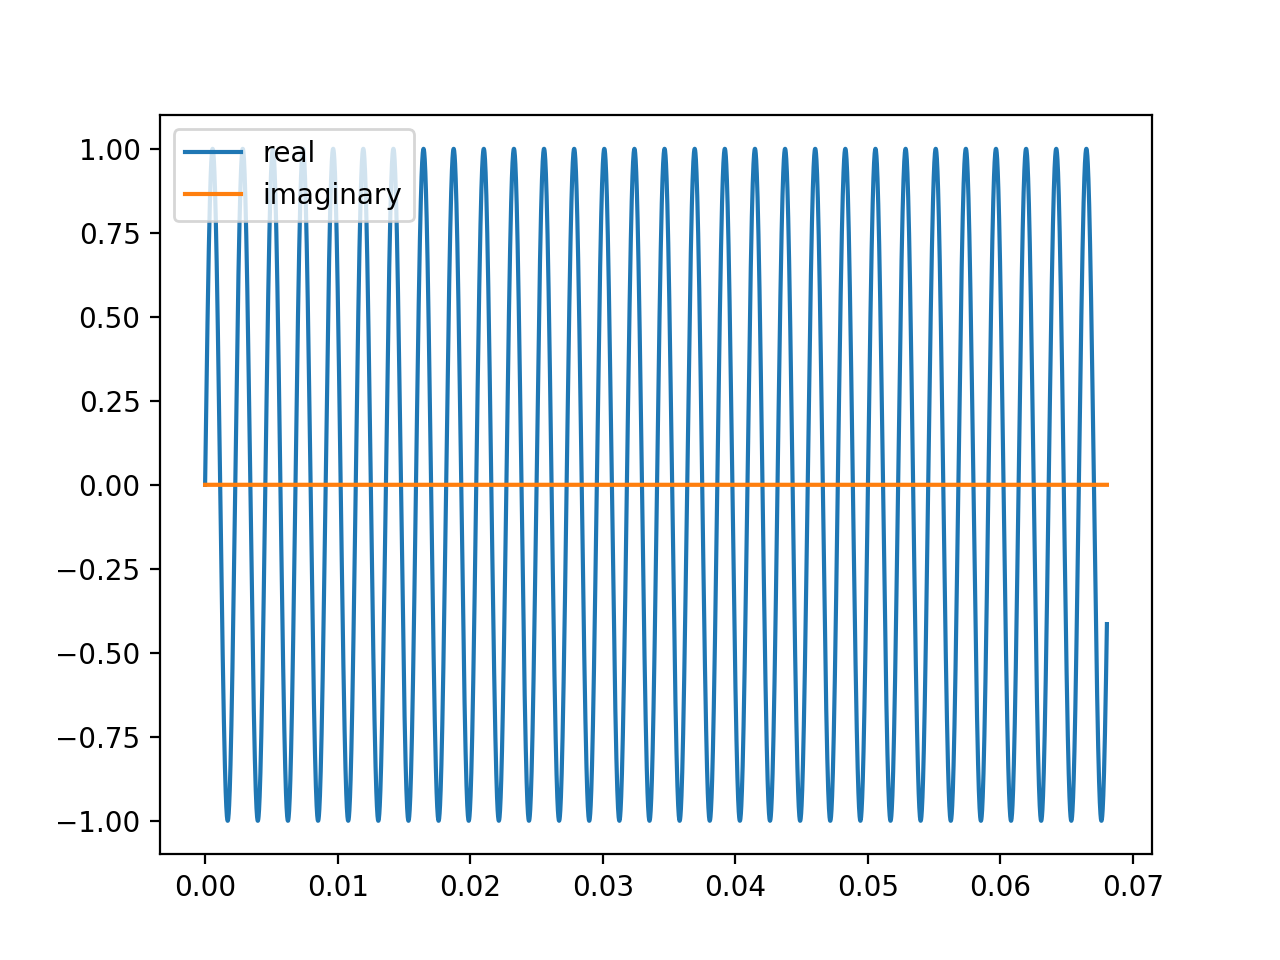

In [11]:
signal_fft = fft.fft(sin_440)
reconstructed_signal = fft.ifft(signal_fft)
plt.plot(time_vector, reconstructed_signal.real)
plt.plot(time_vector, reconstructed_signal.imag)
plt.legend(('real', 'imaginary'))

Plot fast fourier transform representation of a signal:

<IPython.core.display.Javascript object>


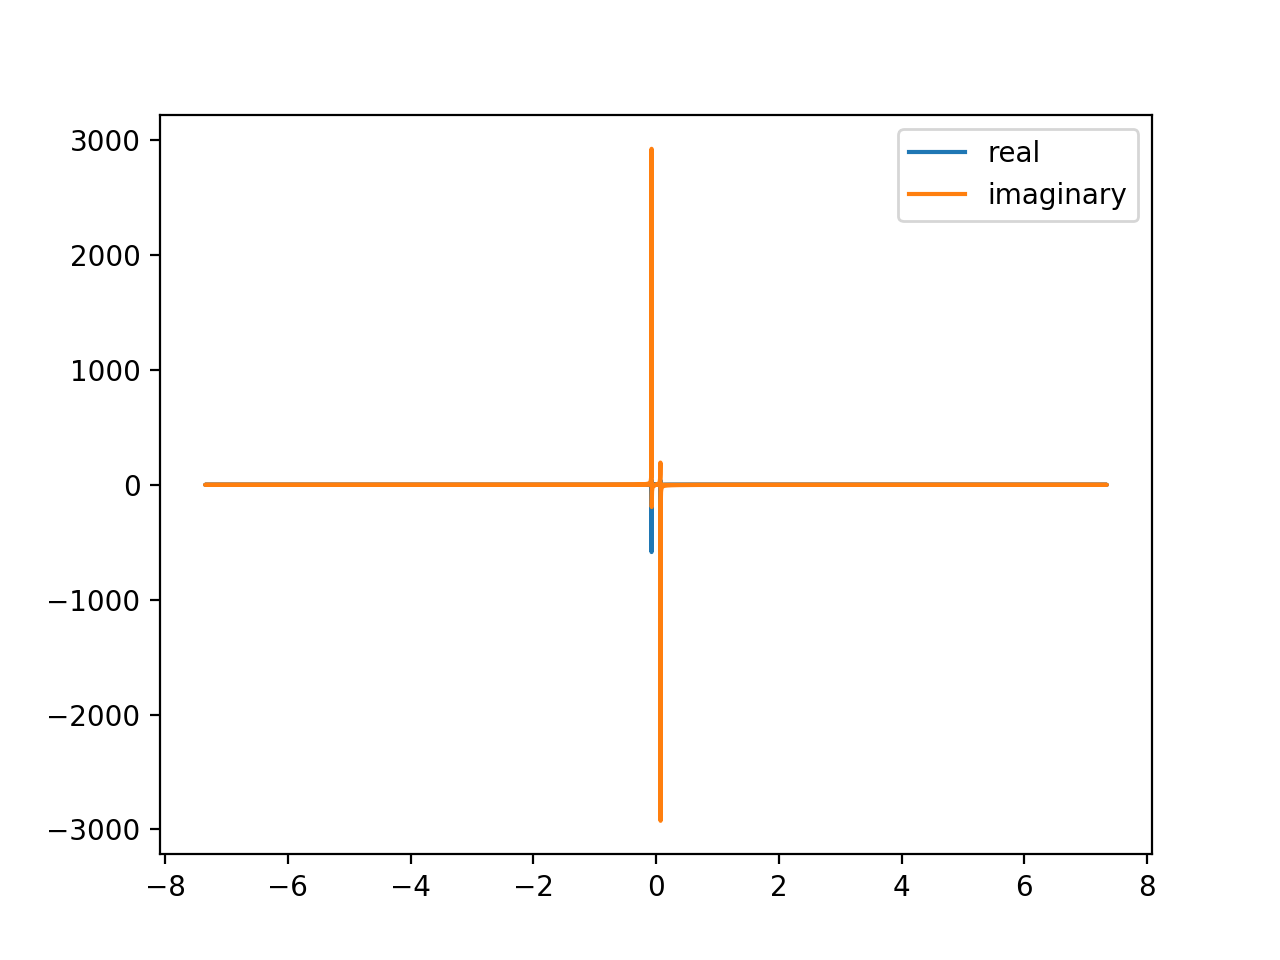

In [12]:
frequency_space = fft.fftfreq(len(signal_fft), frame_period)
plt.plot(frequency_space, signal_fft.real)
plt.plot(frequency_space, signal_fft.imag)
plt.legend(('real', 'imaginary'))